In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Sample_dataset_From_onlineFraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,347,PAYMENT,14491.89,C760502617,0.00,0.00,M1169687643,0.00,0.00,0,0
1,255,PAYMENT,19879.48,C2009509159,69479.00,49599.52,M1621685581,0.00,0.00,0,0
2,13,CASH_IN,132780.97,C1180799370,3364977.39,3497758.36,C1075238398,3771343.46,3638562.49,0,0
3,188,CASH_OUT,160818.25,C1150042374,0.00,0.00,C345684073,692798.76,853617.01,0,0
4,234,CASH_OUT,106847.08,C253067419,30177.00,0.00,C1276274629,0.00,106847.08,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,375,TRANSFER,1460443.68,C1410415484,30106.00,0.00,C1923107810,0.00,1460443.68,0,0
99996,403,CASH_OUT,341700.02,C750575223,302508.00,0.00,C1950131665,231097.90,572797.92,0,0
99997,187,TRANSFER,282458.86,C179351309,0.00,0.00,C1103591913,1153805.12,1436263.99,0,0
99998,383,PAYMENT,31555.47,C1231617719,0.00,0.00,M2046053133,0.00,0.00,0,0


In [3]:
df.shape

(100000, 11)

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.892770,1.777824e+05,8.343933e+05,8.560389e+05,1.092797e+06,1.214286e+06,0.001520,0.0
std,142.942519,5.829591e+05,2.886876e+06,2.923570e+06,3.136394e+06,3.401659e+06,0.038958,0.0
min,1.000000,2.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.344361e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.562865e+04,1.425700e+04,0.000000e+00,1.385022e+05,2.216553e+05,0.000000,0.0
75%,345.000000,2.091351e+05,1.077940e+05,1.457913e+05,9.493802e+05,1.118832e+06,0.000000,0.0
max,738.000000,4.710786e+07,3.618472e+07,3.636535e+07,1.853559e+08,2.145007e+08,1.000000,0.0


In [7]:
df["isFraud"].value_counts()

isFraud
0    99848
1      152
Name: count, dtype: int64

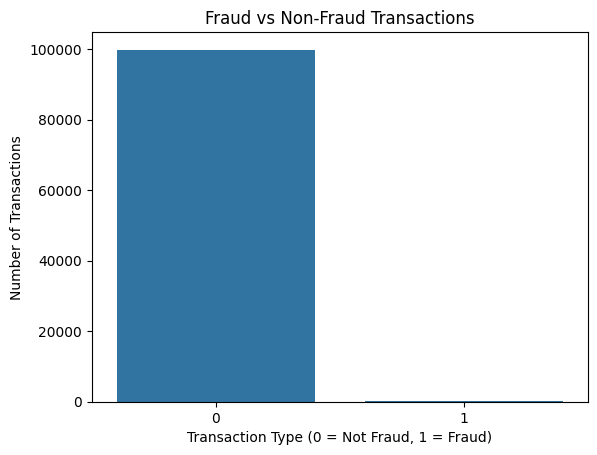

In [8]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Type (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.show()

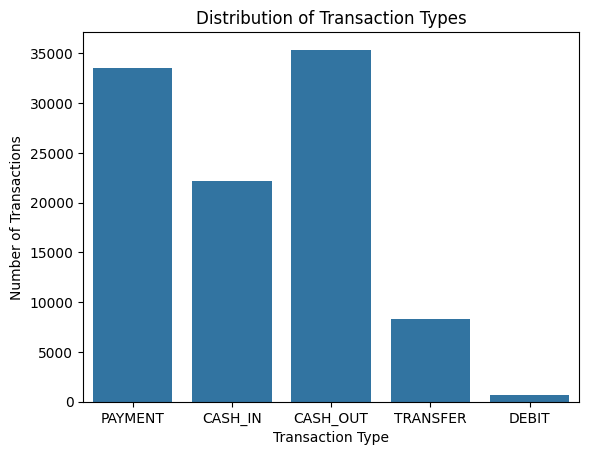

In [9]:
sns.countplot(x='type', data=df)
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.show()

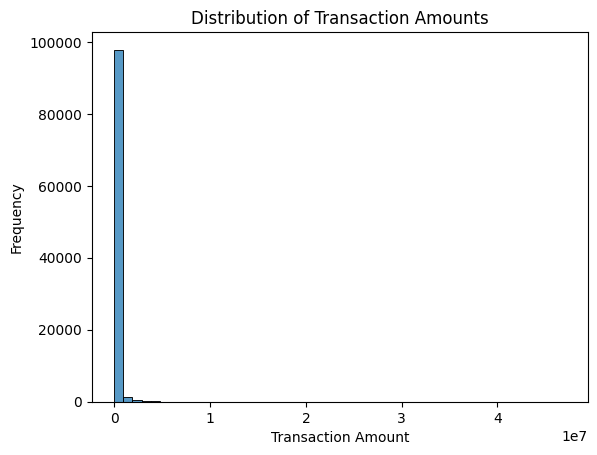

In [10]:
sns.histplot(df['amount'], bins=50, kde=False)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

In [11]:
df = df.drop('isFlaggedFraud',axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,347,PAYMENT,14491.89,C760502617,0.00,0.00,M1169687643,0.00,0.00,0
1,255,PAYMENT,19879.48,C2009509159,69479.00,49599.52,M1621685581,0.00,0.00,0
2,13,CASH_IN,132780.97,C1180799370,3364977.39,3497758.36,C1075238398,3771343.46,3638562.49,0
3,188,CASH_OUT,160818.25,C1150042374,0.00,0.00,C345684073,692798.76,853617.01,0
4,234,CASH_OUT,106847.08,C253067419,30177.00,0.00,C1276274629,0.00,106847.08,0


In [12]:
numeric_df = df.select_dtypes(include=['int32','int64','float32','float64'])
numeric_df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.019464,-0.009583,-0.009715,0.028686,0.026087,0.036006
amount,0.019464,1.000000,-0.003376,-0.007646,0.314728,0.485158,0.069923
oldbalanceOrg,-0.009583,-0.003376,1.000000,0.998889,0.071133,0.044663,0.006026
newbalanceOrig,-0.009715,-0.007646,0.998889,1.000000,0.072860,0.044397,-0.010636
oldbalanceDest,0.028686,0.314728,0.071133,0.072860,1.000000,0.974919,-0.002303
newbalanceDest,0.026087,0.485158,0.044663,0.044397,0.974919,1.000000,0.004363
isFraud,0.036006,0.069923,0.006026,-0.010636,-0.002303,0.004363,1.000000


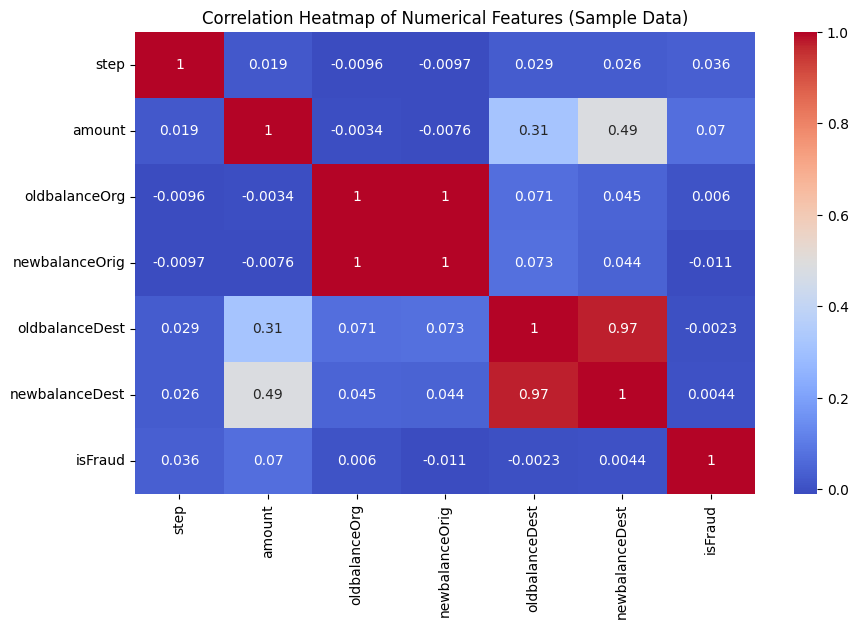

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features (Sample Data)")
plt.show()

# Group the dataset by transaction type and fraud label

In [14]:
groupBY_Type = df.groupby(["type", "isFraud"]).size()
groupBY_Type

type      isFraud
CASH_IN   0          22126
CASH_OUT  0          35282
          1             73
DEBIT     0            658
PAYMENT   0          33556
TRANSFER  0           8226
          1             79
dtype: int64

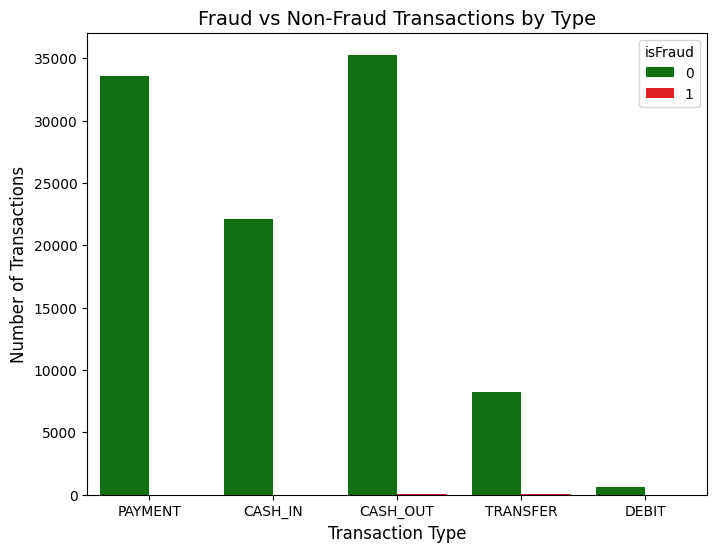

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x="type", hue="isFraud", data=df, palette={0: "green", 1: "red"})

plt.title("Fraud vs Non-Fraud Transactions by Type", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

plt.show()


# Fraud Percentage Calculation & Visualization

In [16]:
counts = df['isFraud'].value_counts()
counts

isFraud
0    99848
1      152
Name: count, dtype: int64

In [17]:
fraud_percentage = df['isFraud'].mean()*100
fraud_percentage

np.float64(0.152)

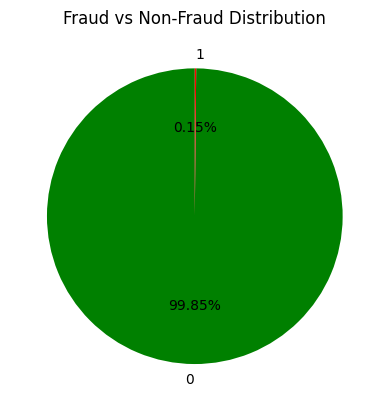

In [18]:
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=['green','red'])
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

# Fraud percentage per transaction type

In [19]:
fraud_percentage = df.groupby('type')['isFraud'].mean() * 100
print(fraud_percentage)


type
CASH_IN     0.000000
CASH_OUT    0.206477
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.951234
Name: isFraud, dtype: float64


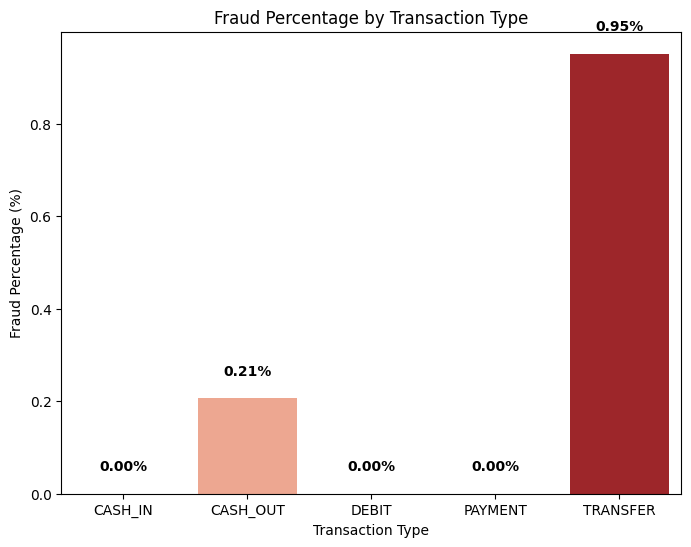

In [20]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=fraud_percentage.index, y=fraud_percentage.values, palette="Reds")

# Add labels on top of bars
for i, v in enumerate(fraud_percentage.values):
    ax.text(i, v + 0.05, f"{v:.2f}%", ha='center', fontweight='bold')

plt.title("Fraud Percentage by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Percentage (%)")
plt.show()

In [21]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# Drop irrelevant columns

In [22]:
df = df.drop(columns=['nameOrig', 'nameDest'])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,347,PAYMENT,14491.89,0.00,0.00,0.00,0.00,0
1,255,PAYMENT,19879.48,69479.00,49599.52,0.00,0.00,0
2,13,CASH_IN,132780.97,3364977.39,3497758.36,3771343.46,3638562.49,0
3,188,CASH_OUT,160818.25,0.00,0.00,692798.76,853617.01,0
4,234,CASH_OUT,106847.08,30177.00,0.00,0.00,106847.08,0
...,...,...,...,...,...,...,...,...
99995,375,TRANSFER,1460443.68,30106.00,0.00,0.00,1460443.68,0
99996,403,CASH_OUT,341700.02,302508.00,0.00,231097.90,572797.92,0
99997,187,TRANSFER,282458.86,0.00,0.00,1153805.12,1436263.99,0
99998,383,PAYMENT,31555.47,0.00,0.00,0.00,0.00,0


# Encode Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,347,3,14491.89,0.00,0.00,0.00,0.00,0
1,255,3,19879.48,69479.00,49599.52,0.00,0.00,0
2,13,0,132780.97,3364977.39,3497758.36,3771343.46,3638562.49,0
3,188,1,160818.25,0.00,0.00,692798.76,853617.01,0
4,234,1,106847.08,30177.00,0.00,0.00,106847.08,0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = scaler.fit_transform(
    df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
)


In [26]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,347,3,-0.280108,-0.289031,-0.292807,-0.348426,-0.356971,0
1,255,3,-0.270866,-0.264964,-0.275842,-0.348426,-0.356971,0
2,13,0,-0.077195,0.876587,0.903598,0.854025,0.712678,0
3,188,1,-0.029100,-0.289031,-0.292807,-0.127535,-0.106028,0
4,234,1,-0.121682,-0.278578,-0.292807,-0.348426,-0.325560,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [29]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,347,3,-0.280108,-0.289031,-0.292807,-0.348426,-0.356971
1,255,3,-0.270866,-0.264964,-0.275842,-0.348426,-0.356971
2,13,0,-0.077195,0.876587,0.903598,0.854025,0.712678
3,188,1,-0.029100,-0.289031,-0.292807,-0.127535,-0.106028
4,234,1,-0.121682,-0.278578,-0.292807,-0.348426,-0.325560


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
model1 = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=42)
model1.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
y_pred = model1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
print(confusion_matrix(y_test, y_pred))

[[19426   544]
 [    6    24]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     19970
           1       0.04      0.80      0.08        30

    accuracy                           0.97     20000
   macro avg       0.52      0.89      0.53     20000
weighted avg       1.00      0.97      0.98     20000



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model2.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred = model2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(confusion_matrix(y_test, y_pred))

[[19970     0]
 [    9    21]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19970
           1       1.00      0.70      0.82        30

    accuracy                           1.00     20000
   macro avg       1.00      0.85      0.91     20000
weighted avg       1.00      1.00      1.00     20000



In [44]:
df[df['isFraud']==0].head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,347,3,-0.280108,-0.289031,-0.292807,-0.348426,-0.356971,0
1,255,3,-0.270866,-0.264964,-0.275842,-0.348426,-0.356971,0
2,13,0,-0.077195,0.876587,0.903598,0.854025,0.712678,0
3,188,1,-0.029100,-0.289031,-0.292807,-0.127535,-0.106028,0
4,234,1,-0.121682,-0.278578,-0.292807,-0.348426,-0.325560,0


In [45]:
df[df['isFraud']==1].head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
465,205,1,0.018339,-0.223745,-0.292807,-0.281570,-0.239921,1
564,557,4,-0.080163,-0.243636,-0.292807,-0.348426,-0.356971,1
1664,389,1,15.238149,2.849656,-0.292807,-0.261874,2.386533,1
1769,403,1,-0.294002,-0.286817,-0.292807,-0.348426,-0.355091,1
2013,432,4,1.251517,0.025276,-0.292807,-0.348426,-0.356971,1


In [46]:
# using Logistic Regression
new_transaction1 = [[347,	3,	-0.280108,	-0.289031,	-0.292807,	-0.348426,	-0.356971]]
model1.predict(new_transaction1)

array([0])

In [47]:
# using Random Forest
model2.predict(new_transaction1)

array([0])

In [48]:
# using Logistic Regression
new_transaction2 = [[557,	4,	-0.080163,	-0.243636,	-0.292807,	-0.348426,	-0.356971]]
model1.predict(new_transaction2)

array([1])

In [49]:
# using Random Forest
model2.predict(new_transaction2)

array([1])